## Model statistical distribution
- Select one numeric column of your data
- Plot probability distribution function
- Plot CDF
- Sampling 10 values from your distribution

In [5]:
library(tidyverse)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
data <- read_xlsx('~/Downloads/data-models/Lecture 7 - Model statistical distribution/M2_Superstore.xlsx')
head(data)

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L2236 / R2236C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L5276 / R5276C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L8800 / R8800C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9148 / R9148C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9149 / R9149C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9150 / R9150C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9388 / R9388C12: '05408'”

Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,⋯,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
<dbl>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,CA-2013-152156,2014-11-09,2014-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,2014-11-09,2014-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
3,CA-2013-138688,2014-06-13,2014-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,⋯,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
4,US-2012-108966,2013-10-11,2013-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,2013-10-11,2013-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
6,CA-2011-115812,2012-06-09,2012-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,⋯,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600,7,0.00,14.1694


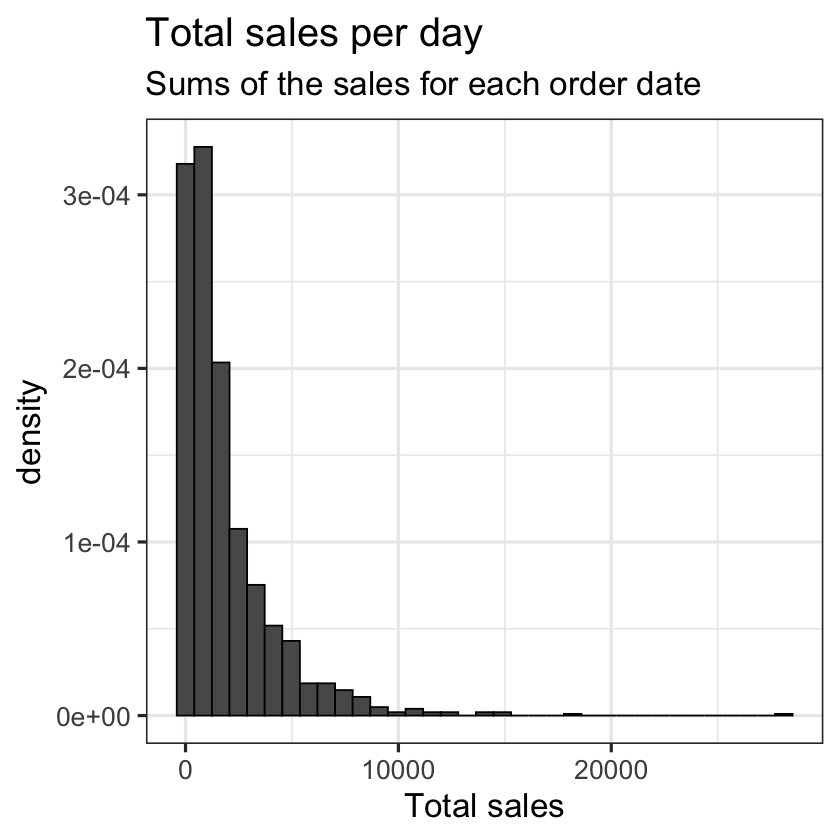

In [46]:
sum_day_sales <- data %>% 
group_by(`Order Date`) %>%
summarise(`Total Sales` = sum(Sales))

ggplot(sum_day_sales) + 
geom_histogram(aes(x = `Total Sales`, y = ..density..), color = 'black', bins = 35) +
xlab('Total sales') +
ggtitle('Total sales per day', subtitle = 'Sums of the sales for each order date') +
theme_bw(base_size = 20)

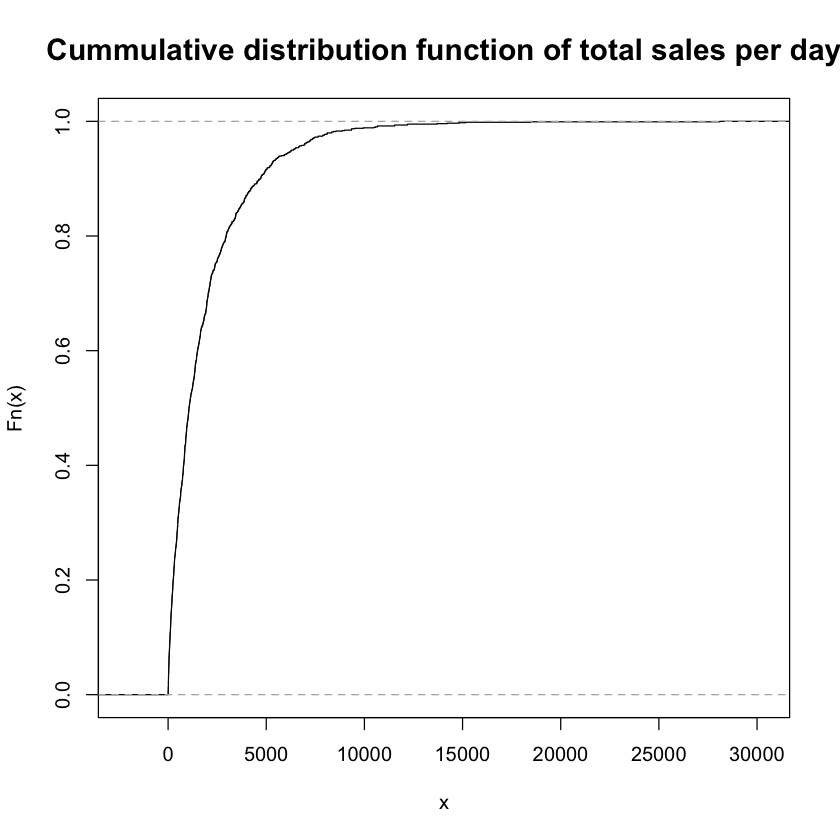

In [47]:
cdf <- ecdf(sum_day_sales$`Total Sales`)
plot(cdf, main = 'Cummulative distribution function of total sales per day', cex.main = 1.5)

In [53]:
quantile(sum_day_sales$`Total Sales`, runif(10))

97.49953% 16.70606% 28.05821% 78.94351% 28.36573% 47.97633% 83.53589%  64.4533% 
7872.0160  199.2545  455.4174 2857.6624  462.9872 1007.4965 3443.5005 1756.1594 
70.54469% 34.76217% 
2084.5458  638.5373

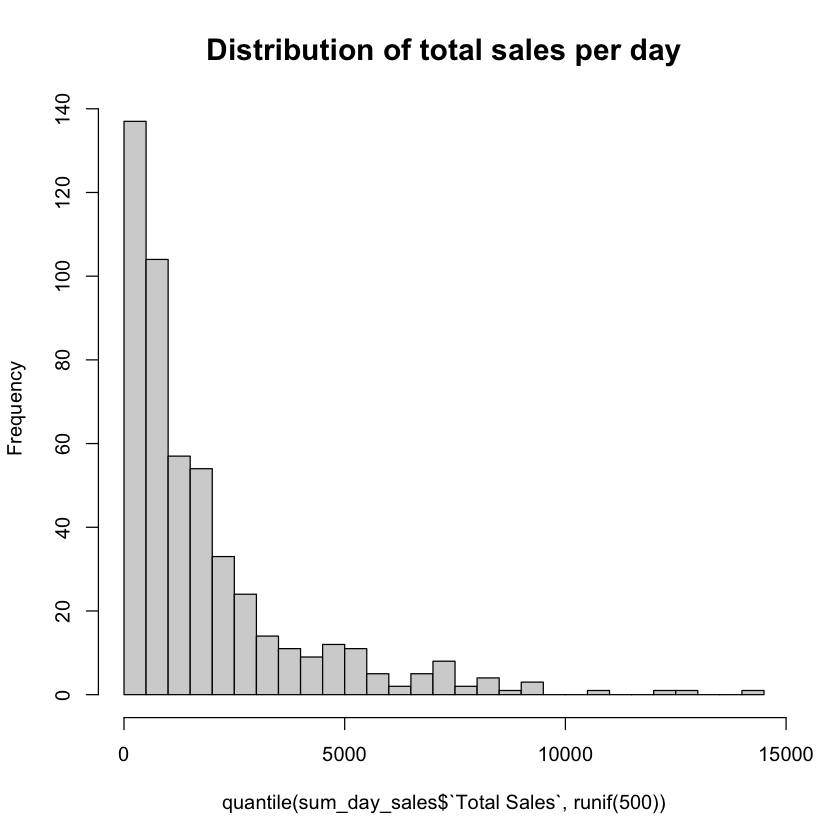

In [58]:
hist(
    quantile(sum_day_sales$`Total Sales`, runif(500)),
    breaks = 30,
    cex.main = 1.5,
    main = 'Distribution of total sales per day'
)